In [1]:
import pandas as pd

df = pd.read_csv('clean data.csv')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# select important columns

selected_columns = [ 'Total Current Liabilities', 'Total Debt','Total Assets, Reported',
                'Revenue Per Share','Total Revenue', 'CO2 Emissions','Company Market Capitalization', 'PPE Total',
               ]

# Load your data
X = df[selected_columns]
y = df['ESG Score']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)


Mean Squared Error:  28.028101164255723
R-squared:  0.9355477914507576


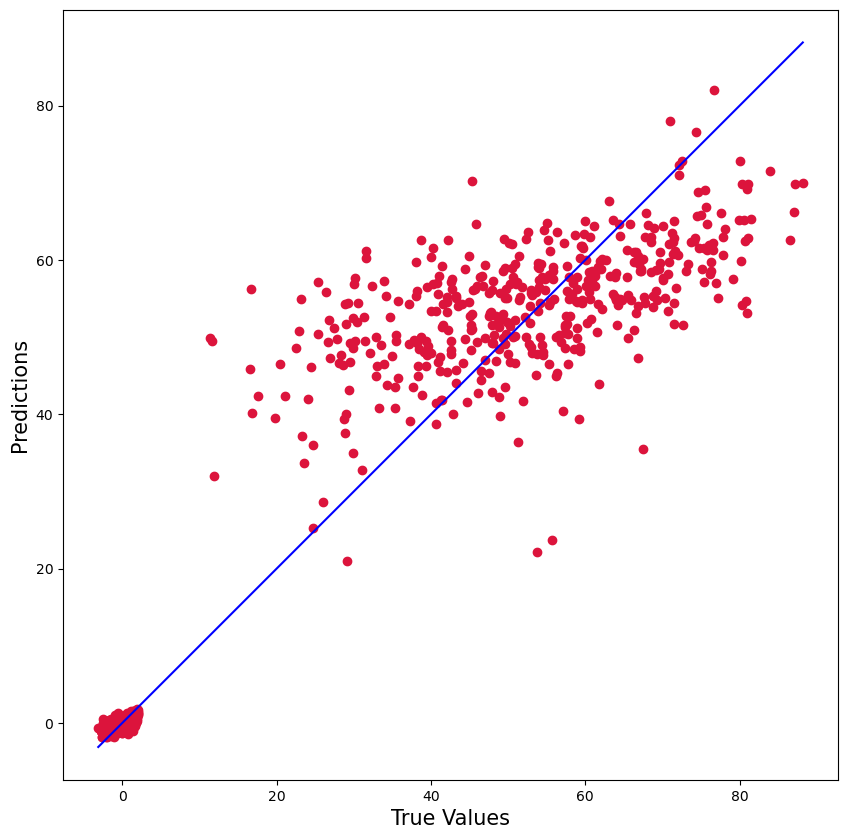

In [3]:
# visualize model performance 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()